## Build Chatbot Webapp with LangChain

**🌟 Why Use LangChain?**<br>
LangChain is a framework for building applications with Large Language Models (LLMs) that makes it easier to:
- Compose components — prompts, models, tools, and memory — together.
- Extend and customize applications as they grow in complexity.
- Add reasoning + memory to make LLMs context-aware and multi-step capable.

It’s used to build chatbots, RAG systems, data agents, and AI workflows that go beyond one-shot prompting.

To get started with LangChain, you will need to install the LangChain module. You can do this by running the following command:

In [ ]:
! pip install langchain

**Modules in Langchain**
Langchain offers a variety of modules that can be used to develop applications powered by language models. Some of them include:<br><br>
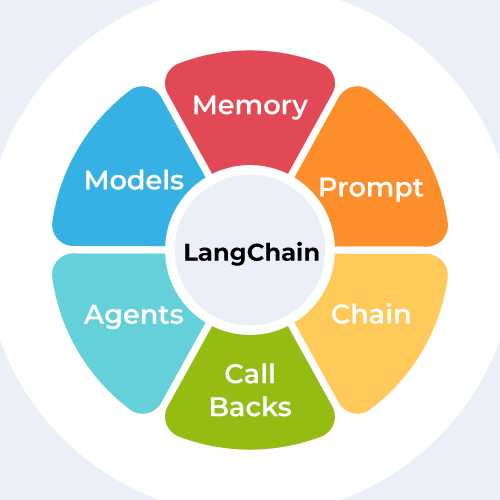


**1. Models:**  

"Models" predominantly refers to Large Language Models (LLMs). These LLMs are characterized by their substantial size, consisting of neural networks with numerous parameters, and being trained on extensive amounts of unlabeled text data. Several prominent LLMs have been developed by tech giants, including:

- **BERT** – *Created by Google, excels at understanding context in text and used for NLP tasks like classification and question answering.*  
- **GPT-3 / ChatGPT** – *Developed by OpenAI, a generative model capable of human-like text generation and conversation.*  
- **LaMDA** – *By Google, designed for dialogue applications with a focus on conversational AI.*  
- **PaLM** – *Another model by Google, powerful for reasoning, translation, and multi-task learning.*  
- **LLaMA** – *By Meta AI, a research-focused LLM optimized for efficiency and performance.*  
- **GPT-4** – *The successor to GPT-3 by OpenAI, with improved reasoning, creativity, and multimodal capabilities.*  
- *And many more…*


In [40]:
from langchain_openai import OpenAI 
from dotenv import load_dotenv # Using .env file to store API key for security
import os

# Load variables from .env
load_dotenv()

# Access your API key
api_key = os.getenv("OPENAI_API_KEY")

# Create the model instance
model = OpenAI(temperature=0.6, openai_api_key=api_key)

prompt = model("Tell me a joke")

print(prompt)



Why couldn't the bicycle stand up by itself? Because it was two-tired!


**2. Prompt:**  

Prompts are a powerful tool for creating text or instructions that are dynamically generated based on user input, other non-static information, and a fixed template string. They are used in a variety of applications, such as:

-  **Chatbots** – *Prompt templates help chatbots understand user input and generate responses relevant to the user's query.*  
-  **Question-answering systems** – *Prompts can create systems that answer user questions comprehensively and informatively.*  
-  **Text summarization** – *Prompt templates can generate automatic summaries of long pieces of text.*  
-  **Code generation** – *Prompts can help systems automatically generate code from natural language descriptions.*  
-  **Natural language inference** – *Prompt templates can determine the relationship between two statements (e.g., entailment, contradiction, neutral).*

Once you have a well-constructed prompt, you may want to reuse it as a template for other purposes. LangChain provides **PromptTemplates**, which help you construct prompts from multiple components efficiently.


In [4]:
from langchain import PromptTemplate

template = "{name} is my favourite course"

prompt = PromptTemplate(
    input_variables=["name"],
    template=template,
)

example = prompt.format(name="Data Structures and Algorithms")

print(example)

Data Structures and Algorithms is my favourite course


**3. Memory:** 

In LangChain, memory is a way of keeping track of the state of a conversation. This helps language models perform better by providing context from previous messages.

There are several ways to implement memory in LangChain:

-  **Buffer Memory** – *Stores a buffer of all previous messages. Simple and useful when you want to keep the exact order of messages.*  
-  **Summary Memory** – *Stores a summary of the conversation history, such as the most recent N messages or keywords mentioned. Good for focusing on overall content.*  
-  **Seq2Seq Memory** – *Uses a sequence-to-sequence model to learn a representation of the conversation history. Helps improve performance on downstream tasks like question answering or summarization.*

The choice of memory type depends on your application:

- **Buffer Memory** → When exact message order matters.  
- **Summary Memory** → When overall content or context is more important.

---

**ChatMessageHistory:** 

The `ChatMessageHistory` class is an important module in LangChain. It is a convenient, lightweight wrapper that helps save **Human** and **AI** messages and fetch them later.

> **NOTE:** This class is generally used if you are managing memory **outside of a Chain**.

**Example:**

In [6]:
from langchain.memory import ChatMessageHistory

chat_history = ChatMessageHistory()

chat_history.add_user_message("Can you give me the solution for 10+10")
chat_history.add_ai_message("The Solution is 10+10=20")
chat_history.add_user_message("Thank You")

print(chat_history.messages)

[HumanMessage(content='Can you give me the solution for 10+10', additional_kwargs={}, response_metadata={}), AIMessage(content='The Solution is 10+10=20', additional_kwargs={}, response_metadata={}), HumanMessage(content='Thank You', additional_kwargs={}, response_metadata={})]


**ConversationBufferMemory:**

This class is a wrapper over ChatMessageHistory class and extracts messages in a variable.

Example:

In [10]:
from langchain.memory import ConversationBufferMemory

# Initialize buffer memory
buff_memory = ConversationBufferMemory()

# Add messages
buff_memory.chat_memory.add_user_message("Can you give me the solution for 10+10")
buff_memory.chat_memory.add_ai_message("The Solution is 10+10=20")
buff_memory.chat_memory.add_user_message("ThankYou")

# Print actual memory content
print(buff_memory.load_memory_variables(inputs={}))

{'history': 'Human: Can you give me the solution for 10+10\nAI: The Solution is 10+10=20\nHuman: ThankYou'}


**4. CHAINS & AGENTS:** 🔗  

Sometimes, a single API call to an LLM is not enough to solve a task. For example, you might need to get information from Wikipedia and then give that information as input to the model.  

This module in LangChain allows you to **chain together multiple tools** in order to solve complex tasks.  

**Example use case:**  
- You could create a chain that:
  1. Retrieves information about a topic from Wikipedia 📰  
  2. Uses that information to generate a title for a YouTube video 🎬  
  3. Uses the title to generate a script for the video ✍️  

Chains make it easy to combine multiple tools to solve complex tasks. This is a **powerful way to use LLMs** to generate text that is both informative and engaging.


In [3]:
from langchain_openai import ChatOpenAI
from langchain.prompts import ChatPromptTemplate, SystemMessagePromptTemplate, HumanMessagePromptTemplate
from dotenv import load_dotenv
import os

load_dotenv()
api_key = os.getenv("OPENAI_API_KEY")

# Initialize GPT-5 Nano
chat_model = ChatOpenAI(model_name="gpt-5-nano", temperature=0.6, openai_api_key=api_key)

# Define prompt template
prompt = ChatPromptTemplate.from_messages([
    SystemMessagePromptTemplate.from_template("You are a helpful assistant."),
    HumanMessagePromptTemplate.from_template("Provide a concise summary about the topic: {topic}")
])

#Create Chain
# Instead of LLMChain, use Runnable pipeline (LangChain 1.0 style)
pipeline = prompt | chat_model

# Example usage with invoke
topic = "India"
summary = pipeline.invoke({"topic": topic}) # The invoke function needs the input as dictionary

print(f"Summary about {topic}:\n")
print(summary)


Summary about India:

content='- India is a South Asian country with a population of over 1.4 billion; New Delhi is the capital.\n- It is a federal parliamentary democracy with 28 states and 8 union territories.\n- The economy is large and diversified, driven by services (notably IT), manufacturing, and agriculture; currency: rupee.\n- Culturally, it is highly diverse—hundreds of languages, many religions, rich arts and cinema (Bollywood), and cricket as a major sport.\n- Geography spans from the Himalayas in the north to tropical coasts in the south, with major rivers like the Ganges and Brahmaputra and significant biodiversity.\n- India plays a growing global role (ISRO, G20, BRICS) while facing development challenges such as poverty, healthcare, infrastructure, and environmental issues.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 2607, 'prompt_tokens': 25, 'total_tokens': 2632, 'completion_tokens_details': {'accepted_prediction_tokens

Some applications require a flexible chain of calls to LLMs and other tools based on user input. The Agent interface provides flexibility for such applications. An agent has access to a suite of tools and determines which ones to use depending on the user input. Agents can use multiple tools, and use the output of one tool as the input to the next.

There are two main types of agents:

- Action agents: at each timestep, decide on the next action using the outputs of all previous actions
- Plan-and-execute agents: decide on the full sequence of actions up front, then execute them all without updating the plan
This module provides a set of agents that can be used. And we will learn precisely about chains and agents by building a project.

# 💻 Mini Project: “KnowledgeBot” with 
This app uses LangChain + Streamlit to create an AI chatbot that remembers conversation history.

**Install Dependencies**
```bash
pip install streamlit langchain openai python-dotenv
```

**Run the App**
```bash
streamlit run knowledgebot.py
```

## **You can find the complete code in your knowledgebot.py file.**

**1. Project Extension Ideas**<br>
Take your KnowledgeBot further:
- RAG Integration — connect to FAISS, Chroma, or Pinecone for document-based Q&A.
- Custom Memory — use ConversationSummaryMemory or VectorStoreRetrieverMemory.
- Multi-Agent System — add Researcher, Writer, and Reviewer agents.
- Tool Augmentation — connect to APIs (Weather, YouTube, Finance).
- LangSmith Integration — trace and debug model calls visually.